# Homework 2
### _Keke Wu_

INFO 5871-001, Prof. Robin Burke, Fall 2019

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Load data file
Ames Housing dataset. See associated data description file for details

In [2]:
ames = pd.read_csv('ames.csv')

Print the shape and output the `head` of the DataFrame to show contents.

Note that because there are so many columns, not all of them are shown. The `...` after `Land.Contour` shows this.

In [3]:
print(ames.shape)
ames.head()

(2930, 82)


,Order,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


To see all of the columns, access the `columns` value for the data frame.

In [4]:
ames.columns

Index(['Order', 'PID', 'MS.SubClass', 'MS.Zoning', 'Lot.Frontage', 'Lot.Area',
       'Street', 'Alley', 'Lot.Shape', 'Land.Contour', 'Utilities',
       'Lot.Config', 'Land.Slope', 'Neighborhood', 'Condition.1',
       'Condition.2', 'Bldg.Type', 'House.Style', 'Overall.Qual',
       'Overall.Cond', 'Year.Built', 'Year.Remod.Add', 'Roof.Style',
       'Roof.Matl', 'Exterior.1st', 'Exterior.2nd', 'Mas.Vnr.Type',
       'Mas.Vnr.Area', 'Exter.Qual', 'Exter.Cond', 'Foundation', 'Bsmt.Qual',
       'Bsmt.Cond', 'Bsmt.Exposure', 'BsmtFin.Type.1', 'BsmtFin.SF.1',
       'BsmtFin.Type.2', 'BsmtFin.SF.2', 'Bsmt.Unf.SF', 'Total.Bsmt.SF',
       'Heating', 'Heating.QC', 'Central.Air', 'Electrical', 'X1st.Flr.SF',
       'X2nd.Flr.SF', 'Low.Qual.Fin.SF', 'Gr.Liv.Area', 'Bsmt.Full.Bath',
       'Bsmt.Half.Bath', 'Full.Bath', 'Half.Bath', 'Bedroom.AbvGr',
       'Kitchen.AbvGr', 'Kitchen.Qual', 'TotRms.AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace.Qu', 'Garage.Type', 'Garage.Yr.Blt',
    

### Cleaning
Prof. de Cock recommends removing the houses larger than 4000 sq. ft. because of anomalies in the data. This should drop 5 observations.

Once we have done this cleaning, we will only use the cleaned data frame for the rest of the assignment.

In [5]:
anomaly = ames['Gr.Liv.Area'] <= 4000
ames_cl = ames[anomaly]
ames_cl.head()

,Order,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [6]:
pd.value_counts(ames_cl['Bldg.Type'])

1Fam      2420
TwnhsE     233
Duplex     109
Twnhs      101
2fmCon      62
Name: Bldg.Type, dtype: int64

In [7]:
obs_count = ames_cl.shape[0]

## Question 1: What are the marginal probabilities of Townhouse and Single Family houses, respectively?
Note that TwnhsE (Townhouse End Unit) and Twnhs (Townhouse Internal Unit) have to be combined to answer this question. Do not enter any numbers in the notebook: everything must be extracted from the data itself.

Steps
- [TODO] calculate value counts
- [TODO] divide the 1Fam and (TwnhsE + Twnhs) values by the total number of observations (can get from shape)
- [TODO] print formatted answer

Hint:
- P(Townhouse) should be around 0.11

In [8]:
bldg_types = pd.value_counts(ames_cl['Bldg.Type'])

In [9]:
townhouse = bldg_types['TwnhsE'] + bldg_types['Twnhs']
single_family = bldg_types['1Fam']
duplex = bldg_types['Duplex']

In [10]:
Twh = townhouse / obs_count
sif = single_family / obs_count
dux = duplex / obs_count

[TODO] Print answers (two digital of precision): 

Use this syntax `print(f"P(Single Family) = {var:.2f}`, where `var` is the variable with the computed probability you're trying to display.


In [11]:
print(f"P(Townhouse) = {Twh:.2f}") 

P(Townhouse) = 0.11


In [12]:
print(f"P(Single Family) = {sif:.2f}")

P(Single Family) = 0.83


## Question 2: What is the relationship between housing type and central air conditioning?

Steps:
- [TODO] Compute the `value_counts` for the `Central.Air` column.
- [TODO] Compute a `crosstab` with `Bldg.Type` as the `index` and `Central.Air` as the `columns`
- [TODO] Compute conditional probabilities P(AC | Single Family) and P(AC | Townhouse) 
- [TODO] Compute conditional probabilities P(Single Family | No AC) and P(Townhouse | No AC)
- [TODO] Compute joint probabilities P(Single Family, AC) and P(Duplex, AC)

In [13]:
pd.value_counts(ames_cl['Central.Air'])

Y    2729
N     196
Name: Central.Air, dtype: int64

In [14]:
type_air_tbl = pd.crosstab(ames_cl['Bldg.Type'], ames_cl['Central.Air'])
type_air_tbl

Central.Air,N,Y
Bldg.Type,,
1Fam,143,2277
2fmCon,28,34
Duplex,25,84
Twnhs,0,101
TwnhsE,0,233


### Conditional probabilities 

- [TODO] P(AC | Single Family)
- [TODO] P(AC | Townhouse)

In [15]:
ac_single = type_air_tbl['Y'].loc['1Fam'] / single_family

In [16]:
ac_twh = (type_air_tbl['Y'].loc['Twnhs'] + type_air_tbl['Y'].loc['TwnhsE']) / townhouse

[TODO] Print answers (two digits precision):

In [17]:
print(f"P(AC | Single Family) = {ac_single:.2f}")

P(AC | Single Family) = 0.94


In [18]:
print(f"P(AC | Townhouse) = {ac_twh:.2f}")

P(AC | Townhouse) = 1.00


Compute

- [TODO] P(Single Family | No AC)
- [TODO] P(Duplex | No AC)

In [19]:
noac_single = type_air_tbl['N'].loc['1Fam'] / type_air_tbl['N'].sum()

In [20]:
noac_duplex = type_air_tbl['N'].loc['Duplex'] / type_air_tbl['N'].sum()

In [21]:
print(f"P(Single Family | No AC) = {noac_single:.2f}")

P(Single Family | No AC) = 0.73


[TODO] Print answers (two digits precision):

In [22]:
print(f"P(Duplex | No AC) = {noac_duplex:.2f}")

P(Duplex | No AC) = 0.13


Compute joint probabilities 

- [TODO] P(Single Family, AC)
- [TODO] P(Duplex, No AC)

In [23]:
ac = type_air_tbl['Y'].sum() / (type_air_tbl['N'].sum() + type_air_tbl['Y'].sum())
noac = 1 - ac
single_ac = sif * ac
duplex_noac = dux * noac

[TODO] Print answer (two digits precision):

Note: to get two digits precision displayed for P(Duplex, No AC), you will need 4 digits past the decimal: `:.4f`

In [24]:
print(f"P(Single Family, AC) = {single_ac:.2f}")
print(f"P(Duplex, No AC) = {duplex_noac:.4f}")

P(Single Family, AC) = 0.77
P(Duplex, No AC) = 0.0025


## Question 3: Understanding probability variants
From the complementarity rule, we know that, because P(AC | Single Family) is quite high (> .90), P(No AC | Single Family) must be small (less than 0.1). If that is the case, why is P(Single Family | No AC) also pretty high (> 0.70)?

Also, given that P(Duplex | No AC) is around 0.13, why is P(Duplex, No AC) so much smaller (approx. factor of 20)?


[TODO] Answer here:

_1. P(Single Family | No AC) is pretty high because in this case, the result of P(No AC|Single Family) has nothing to do with P(Single Family | No AC). Among all building types, no matter there are ACs or not, Single Family has the biggest proportion, and thus the probability of a single family without AC is pretty high when compared with other buiding types._

_2. In the case of P(Duplex|No AC), we are calculating the P(Duplex) only under the condition of No AC, however for P(Duplex, No AC), P(Duplex) and P(No AC) are two independent events, where their respective probability will not influence each other. In the formula P(A|B) = P(A,B)/P(B), the smaller the denominator, the bigger the value of the fraction, beacuse P(No AC) is fairly small, thus P(Duplex|No AC) is bigger than P(Duplex,No Ac)._  

## Question 4: Price ranges for different kinds of houses
In this question, we are going to produce some statistical visualizations of housing prices for different housing types. Later on, we will learn more sophisticated Pandas methods for getting the same results. This week, we are going to be using basic Python data types.

Steps:

- [TODO] Create new smaller data frames for 1fam, townhouse, and duplex properties, containing only the sale price, square footage, and age at time of sale. (We are skipping 2 family conversion properties because there are so many fewer.) I have done the first one, for single-family homes. 
- [TODO] Create a new column price per square foot
- [TODO] Calculate the average home price and avg. price per square foot for each

In [25]:
ames_cl.head()

,Order,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [32]:
ames_cl['Bldg.Type'].head()

0    1Fam
1    1Fam
2    1Fam
3    1Fam
4    1Fam
Name: Bldg.Type, dtype: object

### Single Family

In [27]:
h1fam = ames_cl[ames_cl['Bldg.Type']=='1Fam']
h1fam_price = h1fam['SalePrice']
h1fam_sqft = h1fam['Gr.Liv.Area']
h1fam_age = h1fam['Yr.Sold'] - h1fam['Year.Built'] 
h1fam_ppsq = h1fam_price / h1fam_sqft

df_dict = {'Price': h1fam_price, 'Size': h1fam_sqft, 'NormPrice': h1fam_ppsq, 'Age': h1fam_age}
h1fam_df = pd.DataFrame(df_dict)
h1fam_df.head()

,Price,Size,NormPrice,Age
0,215000,1656,129.830918,50
1,105000,896,117.187500,49
2,172000,1329,129.420617,52
3,244000,2110,115.639810,42
4,189900,1629,116.574586,13


### [TODO] Townhouse

In [28]:
htwh_1 = ames_cl[ames_cl['Bldg.Type']=='TwnhsE']
htwh_2 = ames_cl[ames_cl['Bldg.Type'] == 'Twnhs']
htwh = pd.concat([htwh_1, htwh_2])
htwh_price = htwh['SalePrice']
htwh_sqft = htwh['Gr.Liv.Area']
htwh_age = htwh['Yr.Sold'] - htwh['Year.Built'] 
htwh_ppsq = htwh_price / htwh_sqft

df_dict_twh = {'Price': htwh_price, 'Size': htwh_sqft, 'NormPrice':  htwh_ppsq, 'Age': htwh_age}
htwh_df = pd.DataFrame(df_dict_twh)
htwh_df.head()

,Price,Size,NormPrice,Age
6,213500,1338,159.566517,9
7,191500,1280,149.609375,18
8,236500,1616,146.349010,15
14,212000,1502,141.145140,25
28,184000,1337,137.621541,11


### [TODO] Duplex

In [29]:
hdpx = ames_cl[ames_cl['Bldg.Type']=='Duplex']
hdpx_price = hdpx['SalePrice']
hdpx_sqft = hdpx['Gr.Liv.Area']
hdpx_age = hdpx['Yr.Sold'] - hdpx['Year.Built'] 
hdpx_ppsq = hdpx_price / hdpx_sqft

df_dict_dpx = {'Price': hdpx_price, 'Size': hdpx_sqft, 'NormPrice':  hdpx_ppsq, 'Age': hdpx_age}
hdpx_df = pd.DataFrame(df_dict_dpx)
hdpx_df.head()

,Price,Size,NormPrice,Age
83,112000,1902,58.885384,32
125,84900,1728,49.131944,48
135,154300,2274,67.854002,50
138,135000,1604,84.164589,52
158,144000,1056,136.363636,30


### Boxplot of prices
Boxplot only works with lists (not `DataFrame` or `Series` types), so we have to convert any values that we want to display into lists. 

In this case, we want a data structure that looks like this:

```
[ [list of single-family prices], [list of townhouse prices], [list of duplex prices] ]
```

Steps:
- [TODO] Convert the prices to lists
- [TODO] Create a list of these lists
- [TODO] Create a list of x axis labels for the three types
- [TODO] Plot the boxplot `plt.boxplot(list of lists, labels=labels)`


{'whiskers': [<matplotlib.lines.Line2D at 0x11d5dea20>,
 'caps': [<matplotlib.lines.Line2D at 0x11d5deeb8>,
 'boxes': [<matplotlib.lines.Line2D at 0x11d5de668>,
 'medians': [<matplotlib.lines.Line2D at 0x11d5ea7f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x11d5eab38>,
 'means': []}

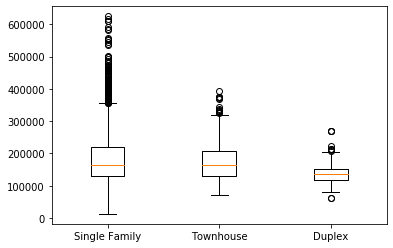

In [37]:
h1fam_price_list = h1fam['SalePrice'].tolist()
htwh_price_list = htwh['SalePrice'].tolist()
hdpx_price_list = hdpx['SalePrice'].tolist()
price_lists = [h1fam_price_list, htwh_price_list, hdpx_price_list]
price_labels = ['Single Family', 'Townhouse', 'Duplex']
plt.boxplot(price_lists, labels=price_labels)

### Boxplot of normalized prices
[TODO] Do the same as above, but for the normalized price (price per square foot) column

{'whiskers': [<matplotlib.lines.Line2D at 0x11d659f98>,
 'caps': [<matplotlib.lines.Line2D at 0x11d667940>,
 'boxes': [<matplotlib.lines.Line2D at 0x11d659e48>,
 'medians': [<matplotlib.lines.Line2D at 0x11d667fd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x11d667f60>,
 'means': []}

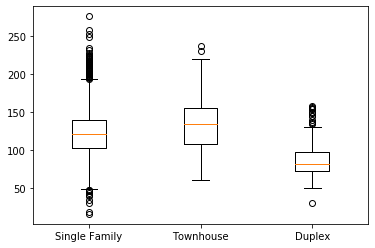

In [38]:
h1fam_ppsq_list = h1fam_ppsq.tolist()
htwh_ppsq_list = htwh_ppsq.tolist()
hdpx_ppsq_list = hdpx_ppsq.tolist()
ppsq_lists = [h1fam_ppsq_list, htwh_ppsq_list, hdpx_ppsq_list]
price_labels = ['Single Family', 'Townhouse', 'Duplex']
plt.boxplot(ppsq_lists, labels=price_labels)

### Analysis
In the Price boxplot, the median (orange line) looks about the same between Single Family and Townhouse, but in the normalized plot, the median for Townhouse is higher. Why is this be the case?

[TODO] Answer here: 
_When we compare prices in the Price boxplot, we're comparing among all the sale prices without considering their building types, the difference between medians is small, however in the normalized plot, we're comparing the prices per square foot, which varies across different building types and thus resulting in a bigger median of normalized price for Townhouse than for Single Family._

## Scatter plot
[TODO] To further under the relationship between house size and price for these two different housing types, we will use a scatter plot, which is useful for showing these kinds of relationships. We will plot Price vs Size and overlay Twhs and SFam.

Steps:
- Use `subplots` as in the in-class example to get the axis object
- Scatter plot for single family
- Scatter plot for townhouse
- Legend

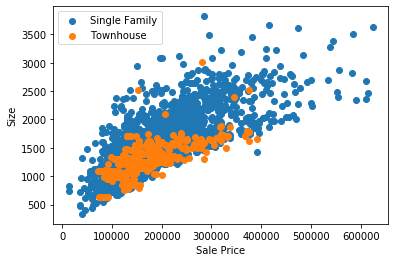

In [69]:
import numpy.random as rnd
rnd.seed(20190915)

# Use subplots to get the axis object (ax) that lets us access all the attributes of a plot
fig, ax = plt.subplots()

# Get the list of values and add a little random noise to each one. 
# X dimensions
x1fam = h1fam_price_list
x1fam_jit = [xval + rnd.rand()/2.0 for xval in x1fam]
xtwh = htwh_price_list
xtwh_jit = [xval + rnd.rand()/2.0 for xval in xtwh]

# Y dimensions
y1fam = h1fam_sqft.tolist()
y1fam_jit = [yval + rnd.rand()/10.0 for yval in y1fam]
ytwh = htwh_sqft.tolist()
ytwh_jit = [yval + rnd.rand()/10.0 for yval in ytwh]

# Plot the values
ax.scatter(x1fam_jit, y1fam_jit, label='Single Family')
ax.scatter(xtwh_jit, ytwh_jit, label='Townhouse')

# Label the axes 
ax.set_xlabel('Sale Price')
ax.set_ylabel('Size')

ax.legend()

How would you compare the distribution of prices for these two different housing types? What about the distribution of sizes? What is a typical townhouse compared to a typical single family house?

[TODO] Answer:
_There is a strong assosication between Sale Price and Size for both housing types, the higher the sale price, the bigger the size is. There is more variability in prices as well as in sizes for Single family than for Townhouse, meaning that Single family has a larger range than . Townhouse. The median for a single family is around (250000,2000), whearas (180000,1300) for a townhouse, thus a typical townhouse has a smaller size and lower sale price when compared to a single family house._



## Histograms

To understand the distribution of single family prices better, we will display two histograms: one of the prices and one of the normalized prices. 

### Prices

[TODO] A histogram of the single family house prices. Use bins of size 50,000 ranging from \$0 to \$700,000.

Compute the bins as follows 
```
bins=[i*50000 for i in range(0,14)]
```

This iterates over the integers 0 to 14, multiplying each by 50,000 to give the bins we want.

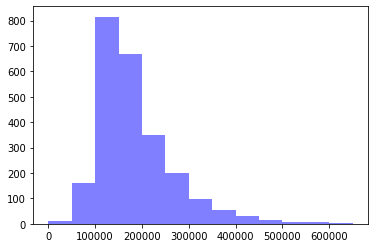

In [80]:
bins=[i*50000 for i in range(0,14)]
n, bins, patches = plt.hist(h1fam_price_list, bins, facecolor='blue', alpha=0.5)

The distribution should be "left-skewed", with a few houses at the upper price range, and a few low-priced "fixers" but a lot of houses within a fairly narrow price band between 100k and 200k.

### Normalized price

[TODO] A histogram of normalized prices for single family houses. Use bins of size 20 from 0 to 300. 

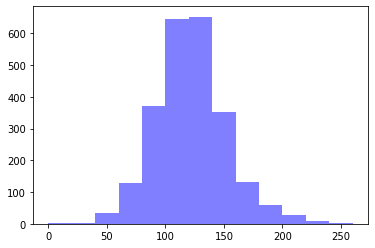

In [91]:
bins2=[i*20 for i in range(0,14)]
n, bins, patches = plt.hist(h1fam_ppsq_list, bins2, facecolor='blue', alpha=0.5)

It should be almost perfectly symmetric, showing that the skew in house prices is almost entirely due to the skew in house sizes.